In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as dataset

In [3]:
iris=dataset.load_iris()
X=iris['data']
y=iris['target']

In [4]:
X_centered=X-X.mean(axis=0)
#function svd(singular value decomposition) decomposes training set X into three matrices with one matrix having principal componenets
U, s, Vt= np.linalg.svd(X_centered)
c1=Vt.T[:,0]
c2=Vt.T[:,1]

#projecting data into d-dimensional hyperplane using principal componenets matrix
Wt=Vt.T[:,:2]
X2D=X_centered.dot(Wt)


In [5]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm_clf=LinearSVC(C=0.1)
svm_clf.fit(X_train,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
from sklearn.metrics import accuracy_score
y_predict=svm_clf.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

In [7]:
mnist=dataset.fetch_openml('mnist_784',version=1)
X=mnist['data']
y=mnist['target']

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.99)
X_reduced=pca.fit_transform(X)

In [9]:
import matplotlib.pyplot as plt
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.figure(1)
plt.plot(cumsum)
plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Explained Variance", fontsize=15)
plt.grid(True)
plt.yticks(np.linspace(0.0,1,10))
plt.xticks(np.arange(0,350,25))
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
pca=PCA(n_components=0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_reduced=pca.fit_transform(X)

In [12]:
X_recovered=pca.inverse_transform(X_reduced)

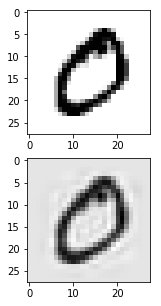

In [13]:
plt.figure(figsize=(5,5))
plt.subplot(211)
image1=X[1].reshape(28,28)
plt.imshow(image1,interpolation='nearest',cmap=plt.cm.binary)
plt.subplot(212)
image2=X_recovered[1].reshape(28,28)
plt.imshow(image2,interpolation='nearest',cmap=plt.cm.binary)
plt.show()

In [14]:
from sklearn.decomposition import IncrementalPCA
n_batch=100
ipca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X,n_batch):
    ipca.partial_fit(X_batch)


In [15]:
X_reduced=ipca.transform(X)

In [16]:
from sklearn.decomposition import KernelPCA
X,t=dataset.make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)

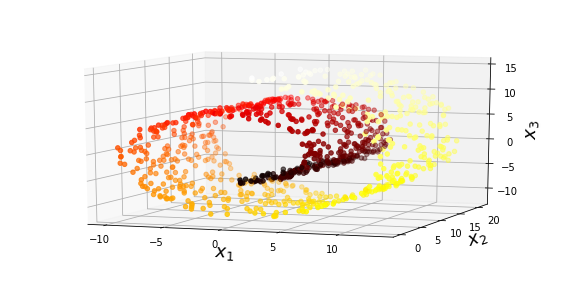

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10,-70)
ax.set_xlabel("$x_1$",fontsize=18)
ax.set_ylabel("$x_2$",fontsize=18)
ax.set_zlabel("$x_3$",fontsize=18)
plt.show()

In [18]:
rbf_pca=KernelPCA(kernel='rbf',gamma=0.05,n_components=2)
sigmoid_pca=KernelPCA(kernel='sigmoid',n_components=2,gamma=0.01,coef0=1)
linear_pca=KernelPCA(kernel='linear',n_components=2)
X_reduced_rbf=rbf_pca.fit_transform(X)
X_reduced_sigmoid=sigmoid_pca.fit_transform(X)
X_reduced_linear=linear_pca.fit_transform(X)

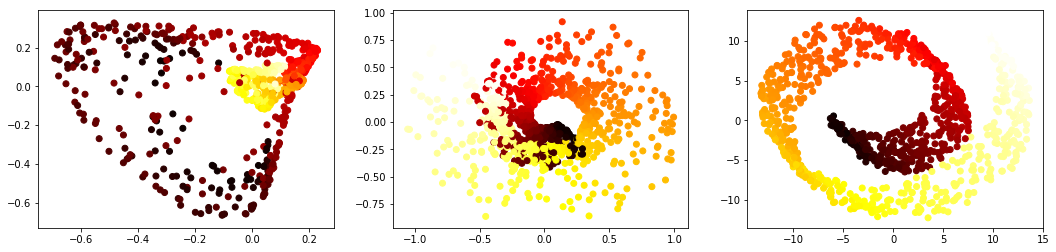

In [19]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.scatter(X_reduced_rbf[:,0],X_reduced_rbf[:,1],c=t,cmap=plt.cm.hot)
plt.subplot(132)
plt.scatter(X_reduced_sigmoid[:,0],X_reduced_sigmoid[:,1],c=t,cmap=plt.cm.hot)
plt.subplot(133)
plt.scatter(X_reduced_linear[:,0],X_reduced_linear[:,1],c=t,cmap=plt.cm.hot)
plt.show()

In [20]:
X=dataset.make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)
y=X[1]
X=X[0]

In [21]:
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf=Pipeline([('kpca',KernelPCA(n_components=2)),('log_reg',LinearRegression())])

param_grid={"kpca__gamma":np.linspace(0.03,0.05,10), "kpca__kernel":['rbf','sigmoid']}

grid_search=GridSearchCV(clf,param_grid,cv=5,iid=False)
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
mnist=dataset.fetch_openml('mnist_784',version=1)
X=mnist['data']
y=mnist['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [32]:
X_val=X_test[0:8000]
y_val=y_test[0:8000]
X_test=X_test[8000:]
y_test=y_test[8000:]

In [33]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=100,bootstrap=False,n_jobs=-1,random_state=42, max_features=0.5, max_depth=2)
import time

In [34]:
start=time.time()
rnd_clf.fit(X_train,y_train)
end=time.time()
print(end-start)

73.06260466575623


In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
predict=cross_val_predict(rnd_clf,X_val,y_val,cv=5)
accuracy_score(y_val,predict)

0.435625

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)

In [40]:
start=time.time()
rnd_clf.fit(X_train_reduced,y_train)
end=time.time()
print(end-start)

47.02723288536072


In [43]:
X_val_reduced=pca.fit_transform(X_val)
predict=cross_val_predict(rnd_clf,X_val_reduced,y_val)
accuracy_score(y_val,predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5355

In [ ]:
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding
tsne=TSNE(n_components=2, random_state=42)
X_reduced=tsne.fit_transform(X)

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(X_redcued,c=y,cmap=plt.cm.hot)
plt.show()